<a href="https://colab.research.google.com/github/HwangHanJae/Dacon_tutorial/blob/main/Dacon_kbo_ops_visualization_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이콘 링크

[출처1](https://dacon.io/competitions/official/62540/overview/description)


[출처2](https://dacon.io/competitions/official/235546/codeshare/592?page=1&dtype=recent&ptype=undefined)


# 0.라이브러리 로드

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from IPython.display import set_matplotlib_formats

plt.style.use('ggplot')
set_matplotlib_formats("svg")
warnings.filterwarnings('ignore')

In [2]:
#한글 폰트
import matplotlib.font_manager as fm

#나눔고딕 폰트 인스톨
!apt-get update -qq
!apt-get install fonts-nanum* -qq

fm._rebuild()

#한글폰트경로(나눔바른고딕)
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

font_name = fm.FontProperties(fname=fontpath).get_name()
print(font_name)
# 맷플롯라이브러리에 폰트 설정
plt.rc('font', family='NanumBarunGothic') 
# 진행후에 런타임 다시시작

NanumBarunGothic


# 1.데이터 로드

## 1.1 데이터 구성

- batter_id : 타자의 고유 아이디
- batter_name : 타자 이름
- year : 년도
- team : 소속팀
- avg : 타율
- G : 출전게임수
- AB : 타수(타석-볼넷-사구-희생번트-희생플라이)
- R : 득점
- H : 안타(1루타+2루타+3루타+홈런)
- 2B : 2루타
- 3B : 3루타
- HR : 홈런
- TB : 루타수
- RBI : 타점
- SB : 도루성공
- CS : 도루실패
- BB : 볼넷
- HBP : 사구(몸에 맞는 볼)
- SO : 삼진아웃
- GDP : 병살타
- SLG : 장타율
- OBP : 출루율
- E : 에러
- height/weight : 선수의 키/몸무게
- year_born : 선수의 생년월일
- position : 선수의 수비위치
- career : 선수의 커리어
- staring_salary : 선수의 한국프로야구 입단연봉
- OPS(target) : OBP(출루율) + SLG(장타율)

In [3]:
regular = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/Data/baseball/Regular_Season_Batter.csv")

In [4]:
#데이터 미리보기
#데이터 미리보기시 컬럼 갯수 늘리기
pd.set_option("display.max_columns", 500)
regular.head()

batter_id batter_name  year team    avg    G   AB   R   H  2B  3B  HR   TB  \
0          0        가르시아  2018   LG  0.339   50  183  27  62   9   0   8   95   
1          1         강경학  2011   한화  0.000    2    1   0   0   0   0   0    0   
2          1         강경학  2014   한화  0.221   41   86  11  19   2   3   1   30   
3          1         강경학  2015   한화  0.257  120  311  50  80   7   4   2  101   
4          1         강경학  2016   한화  0.158   46  101  16  16   3   2   1   26   

   RBI  SB  CS  BB  HBP  SO  GDP    SLG    OBP   E height/weight  \
0   34   5   0   9    8  25    3  0.519  0.383   9    177cm/93kg   
1    0   0   0   0    0   1    0  0.000  0.000   1    180cm/72kg   
2    7   0   0  13    2  28    1  0.349  0.337   6    180cm/72kg   
3   27   4   3  40    5  58    3  0.325  0.348  15    180cm/72kg   
4    7   0   0   8    2  30    5  0.257  0.232   7    180cm/72kg   

       year_born   position                                  career  \
0  1985년 04월 12일  내야수(우투우타)  쿠바 Ciego de Avila Maximo Gomez Baez(대)   
1  1992년 08월 11일  내야수(우투좌타)                       광주대성초-광주동성중-광주동성고   
2  1992년 08월 11일  내야수(우투좌타)                       광주대성초-광주동성중-광주동성고   
3  1992년 08월 11일  내야수(우투좌타)                       광주대성초-광주동성중-광주동성고   
4  1992년 08월 11일  내야수(우투좌타)                       광주대성초-광주동성중-광주동성고   

  starting_salary    OPS  
0             NaN  0.902  
1         10000만원  0.000  
2         10000만원  0.686  
3         10000만원  0.673  
4         10000만원  0.489

In [5]:
#데이터 컬럼 확인하기
regular.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS'],
      dtype='object')

레귤러 데이터 셋에서 Null 값이 없는 데이터 셋 만들기

In [6]:
regular = regular.loc[~regular["OPS"].isnull()]

대회 제출용 정답지 파일 만들기

In [7]:
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/Data/baseball/submission.csv")

컬럼 딕셔너리 만들기

In [8]:
agg = {}

for i in regular.columns:
  agg[i] = []

In [9]:
for i in submission['batter_name'].unique():
  for j in regular.columns:
    if j in ['batter_id', 'batter_name','height/weight','year_born','position','starting_salary']:
      agg[j].append(regular.loc[regular['batter_name']==i,j].iloc[0])
    elif j =='year':
      agg[j].append(2019)
    else:
      agg[j].append(0)

regular = pd.concat([regular, pd.DataFrame(agg)])

# 2.데이터 미리보기

클래스 속성

로우 갯수 RangeIndexL 2554 entries, 0 to 2453
 
컬럼 갯수 Data columns (total 29 columns)

키와 몸무게 컬럼의 차이 확인 "height/weight 1652 non-null object"

특히 우리는 추후 None Numerical 인 Object 데이터 ㅌ타입의 처리에 신경을 써야 된다.

In [10]:
regular.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2648 entries, 0 to 219
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batter_id        2648 non-null   int64  
 1   batter_name      2648 non-null   object 
 2   year             2648 non-null   int64  
 3   team             2648 non-null   object 
 4   avg              2648 non-null   float64
 5   G                2648 non-null   int64  
 6   AB               2648 non-null   int64  
 7   R                2648 non-null   int64  
 8   H                2648 non-null   int64  
 9   2B               2648 non-null   int64  
 10  3B               2648 non-null   int64  
 11  HR               2648 non-null   int64  
 12  TB               2648 non-null   int64  
 13  RBI              2648 non-null   int64  
 14  SB               2648 non-null   int64  
 15  CS               2648 non-null   int64  
 16  BB               2648 non-null   int64  
 17  HBP            

In [11]:
regular.head()

batter_id batter_name  year team    avg    G   AB   R   H  2B  3B  HR   TB  \
0          0        가르시아  2018   LG  0.339   50  183  27  62   9   0   8   95   
1          1         강경학  2011   한화  0.000    2    1   0   0   0   0   0    0   
2          1         강경학  2014   한화  0.221   41   86  11  19   2   3   1   30   
3          1         강경학  2015   한화  0.257  120  311  50  80   7   4   2  101   
4          1         강경학  2016   한화  0.158   46  101  16  16   3   2   1   26   

   RBI  SB  CS  BB  HBP  SO  GDP    SLG    OBP   E height/weight  \
0   34   5   0   9    8  25    3  0.519  0.383   9    177cm/93kg   
1    0   0   0   0    0   1    0  0.000  0.000   1    180cm/72kg   
2    7   0   0  13    2  28    1  0.349  0.337   6    180cm/72kg   
3   27   4   3  40    5  58    3  0.325  0.348  15    180cm/72kg   
4    7   0   0   8    2  30    5  0.257  0.232   7    180cm/72kg   

       year_born   position                                  career  \
0  1985년 04월 12일  내야수(우투우타)  쿠바 Ciego de Avila Maximo Gomez Baez(대)   
1  1992년 08월 11일  내야수(우투좌타)                       광주대성초-광주동성중-광주동성고   
2  1992년 08월 11일  내야수(우투좌타)                       광주대성초-광주동성중-광주동성고   
3  1992년 08월 11일  내야수(우투좌타)                       광주대성초-광주동성중-광주동성고   
4  1992년 08월 11일  내야수(우투좌타)                       광주대성초-광주동성중-광주동성고   

  starting_salary    OPS  
0             NaN  0.902  
1         10000만원  0.000  
2         10000만원  0.686  
3         10000만원  0.673  
4         10000만원  0.489

In [12]:
regular.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS'],
      dtype='object')

# 3.간단한 EDA

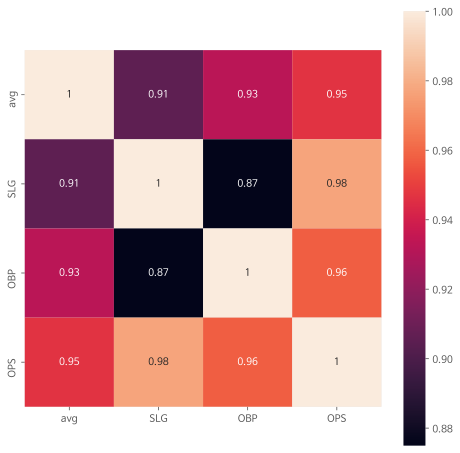

In [26]:
corr = regular.loc[:, regular.dtypes =='float64'].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, square=True, annot=True,)

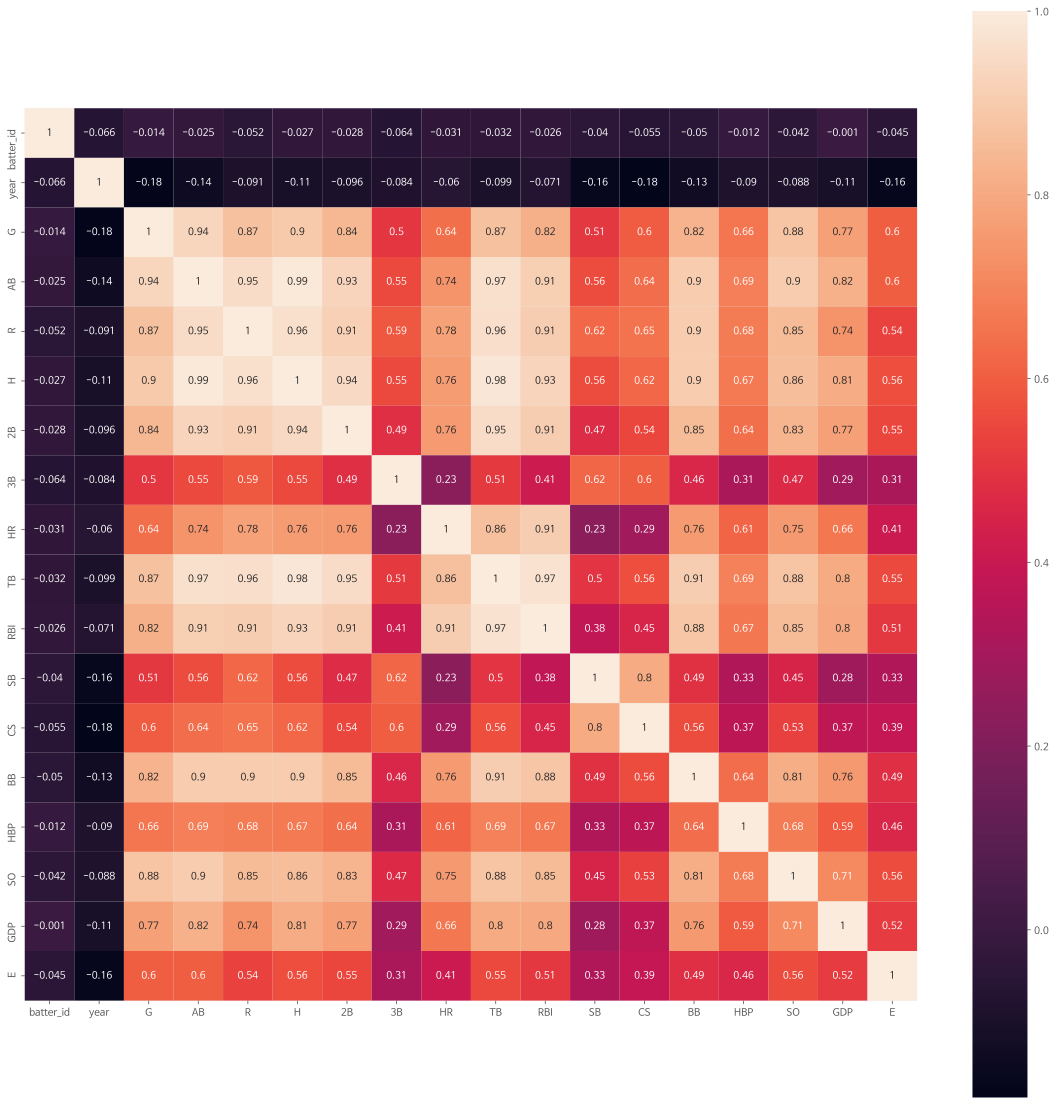

In [27]:
corr = regular.loc[:, regular.dtypes == "int64"].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, square=True, annot=True,)

In [28]:
plt.figure(figsize=(10,10))
sns.pairplot(regular.loc[:, regular.dtypes == "float64"])

<Figure size 720x720 with 0 Axes>

In [29]:
plt.figure(figsize=(10,10))

# sns.pairplot(regular.loc[:, regular.dtypes == "int64"])

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

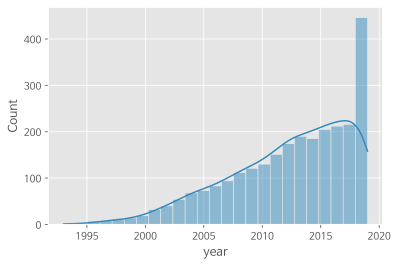

In [30]:
# sns.distplot(regular['year'])
sns.histplot(data=regular, x='year', kde=True)

년도 작아질수록 그 수가 작다

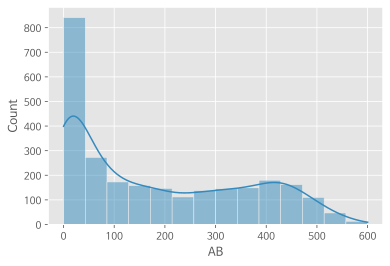

In [31]:
sns.histplot(data=regular, x='AB', kde=True)

타석에 100번 이하 들어온 타자들이 많다.

In [32]:
regular["AB"].describe()

count    2648.000000
mean      186.751133
std       171.447888
min         0.000000
25%        23.000000
50%       138.000000
75%       342.000000
max       600.000000
Name: AB, dtype: float64

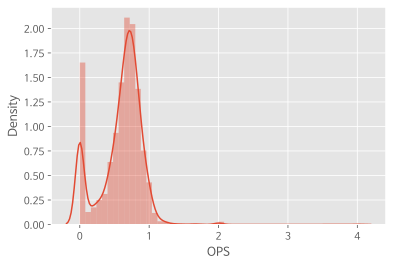

In [33]:
sns.distplot(regular['OPS'].dropna())

OPS(OBP+SLG)(출루율 + 장타율 )의 분포는 대략적으로 정규분포를 따른다.

In [34]:
regular['OPS'].describe()

count    2648.000000
mean        0.595941
std         0.308147
min         0.000000
25%         0.477229
50%         0.668000
75%         0.786711
max         4.000000
Name: OPS, dtype: float64

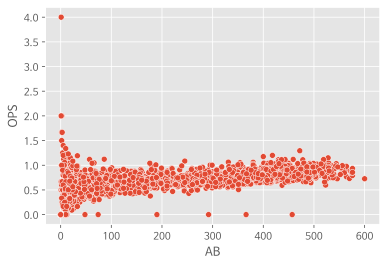

In [35]:
sns.scatterplot(data=regular, x='AB', y='OPS')


타석수(AB)와 OPS는 양의 상관관계를 가진다.

시즌이 진해욈에 따라 잘하는 선수는 많이 기용되고, 못하는 선수는 적게 기용되기 때문이라고 보여짐

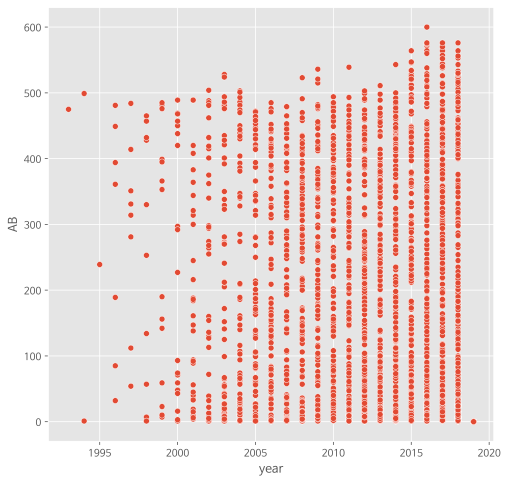

In [36]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=regular, x='year', y='AB')

In [37]:
regular.groupby("position")["OPS"].mean()

position
내야수(우투양타)    0.235714
내야수(우투우타)    0.606139
내야수(우투좌타)    0.537651
내야수(좌투좌타)    0.691359
외야수(우투양타)    0.542667
외야수(우투우타)    0.588131
외야수(우투좌타)    0.586589
외야수(좌투좌타)    0.596368
포수(우투우타)     0.527660
포수(우투좌타)     0.460944
Name: OPS, dtype: float64

<Figure size 576x576 with 0 Axes>

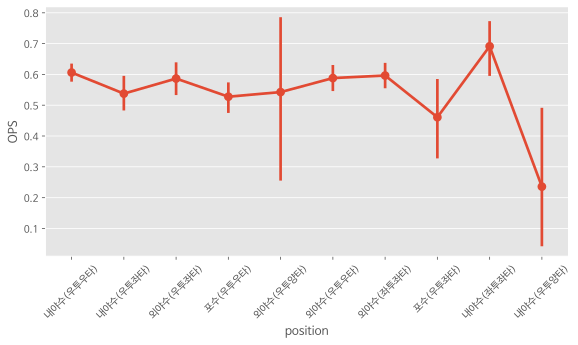

In [40]:
plt.figure(figsize=(8,8))
g = sns.factorplot(data=regular, x='position', y='OPS', size=4, aspect=2)
g.set_xticklabels(rotation=45)

# 4.운과 실력 구분하기

- 자기상관이라는 개념으로 수직적으로 접근
- 각 선수의 연속된 두 시리즈간의 특정 스탯의 상관관계를 알아보기
- 자기상관계수가 낮다면 운에 의해 많은 영향을 받는 변동성이 큰 지표
- 자기상관계수가 높다면 운에 의해 영향을 덜 받은 진짜 실력

In [86]:
def get_self_corr(var, regular=regular):
  x=[]
  y=[]
  regular1 = regular.loc[regular["AB"] >= 50]
  for name in regular1['batter_name'].unique():
    a = regular1.loc[regular1["batter_name"] == name].sort_values("year")
    k=[]
    for i in a['year'].unique():
      if(a['year'] == i+1).sum()==1:
        k.append(i)
    for i in k:
      x.append(a.loc[a["year"]==i,var].iloc[0])
      y.append(a.loc[a["year"]==i+1,var].iloc[0])
  plt.title(var)
  sns.scatterplot(x,y)
  plt.xlabel(i)
  plt.ylabel(i+1)
  plt.show()
  print("{}_corr : {} \n".format(var,pd.Series(x).corr(pd.Series(y))**2))

In [83]:
regular["1B"] = regular["H"]-(regular["2B"]+regular["3B"]+regular["HR"])

In [84]:
regular.head()

batter_id batter_name  year team    avg    G   AB   R   H  2B  3B  HR   TB  \
0          0        가르시아  2018   LG  0.339   50  183  27  62   9   0   8   95   
1          1         강경학  2011   한화  0.000    2    1   0   0   0   0   0    0   
2          1         강경학  2014   한화  0.221   41   86  11  19   2   3   1   30   
3          1         강경학  2015   한화  0.257  120  311  50  80   7   4   2  101   
4          1         강경학  2016   한화  0.158   46  101  16  16   3   2   1   26   

   RBI  SB  CS  BB  HBP  SO  GDP    SLG    OBP   E height/weight  \
0   34   5   0   9    8  25    3  0.519  0.383   9    177cm/93kg   
1    0   0   0   0    0   1    0  0.000  0.000   1    180cm/72kg   
2    7   0   0  13    2  28    1  0.349  0.337   6    180cm/72kg   
3   27   4   3  40    5  58    3  0.325  0.348  15    180cm/72kg   
4    7   0   0   8    2  30    5  0.257  0.232   7    180cm/72kg   

       year_born   position                                  career  \
0  1985년 04월 12일  내야수(우투우타)  쿠바 Ciego de Avila Maximo Gomez Baez(대)   
1  1992년 08월 11일  내야수(우투좌타)                       광주대성초-광주동성중-광주동성고   
2  1992년 08월 11일  내야수(우투좌타)                       광주대성초-광주동성중-광주동성고   
3  1992년 08월 11일  내야수(우투좌타)                       광주대성초-광주동성중-광주동성고   
4  1992년 08월 11일  내야수(우투좌타)                       광주대성초-광주동성중-광주동성고   

  starting_salary    OPS  1B  
0             NaN  0.902  45  
1         10000만원  0.000   0  
2         10000만원  0.686  13  
3         10000만원  0.673  67  
4         10000만원  0.489  10

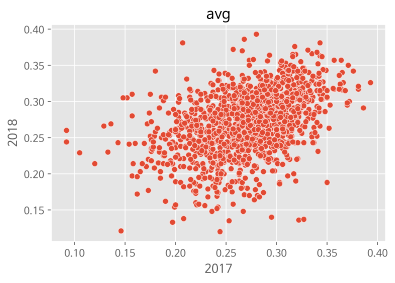

avg_corr : 0.179871942515314 



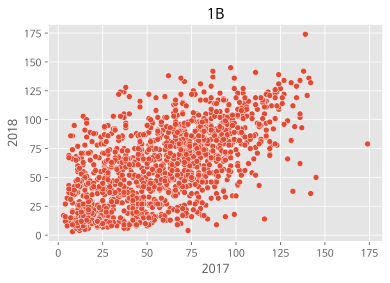

1B_corr : 0.3579451034966973 



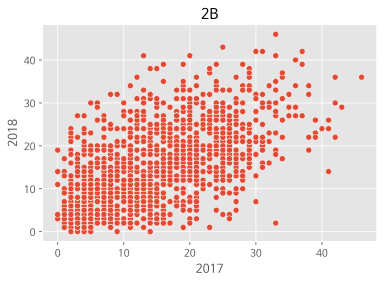

2B_corr : 0.3216523588655752 



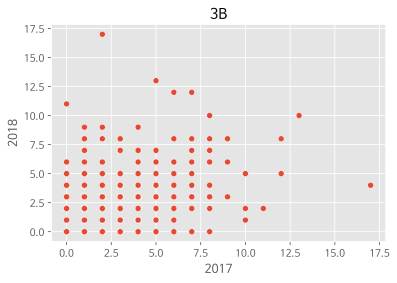

3B_corr : 0.2001112514921482 



In [87]:
for i in ['avg','1B',"2B","3B"]:
  get_self_corr(i)

타율, 1루타, 2루타, 3루타의 선수별로 년도 자기상관계수는 낮은 편이다.

이들은 선수의 역량과 관계없는 운적인 요소에 좌우된다는 것을 알 수 있다.

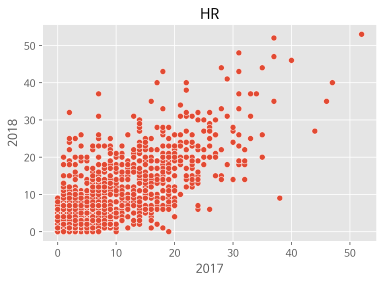

HR_corr : 0.550597629294443 



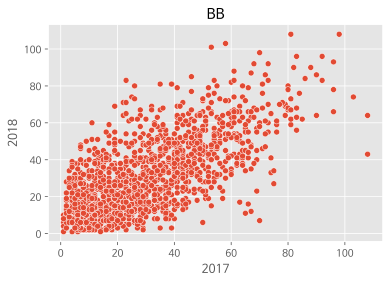

BB_corr : 0.4540205212597894 



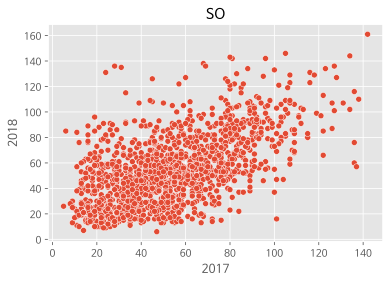

SO_corr : 0.3266394990670343 



In [89]:
for i in["HR", "BB","SO"]:
  get_self_corr(i)

홈런, 볼넷의 선수별로 년도별 자기상관계수가 높은 편이다.

이는 운적인 요소가 비교적 덜 개입된, 즉 선수의 진짜 실력을 잘 보여주는 지표라고 할 수 있다.

운적인 요소에 많이 영향을 받는 스탯 : 1B, 2B, 3B

운적인 요소에 많이 영향을 받지 않는 스탯 : HR, BB, SO


# 5.새로운지표생성

1B_LUCK = (1B)/(AB-HR-SO)
2B_LUCK = (2B)/(AB-HR-SO)
3B_LUCK = (3B)/(AB-HR-SO)

이 지표들은 운적인 요소에 영향을 많이 받지 않는 HR, BB, SO와 같은 스탯의 영향력을 극소화시키면서, 선수의 해당 시즌 "운빨"을 극단적으로 보여주기 위하여 만듬

이렇게 만든 지표는 해당 시즌 선수가 얼마나 운이 좋았는지를 알려줌


In [91]:
regular["1B_luck"] = regular["1B"] / (regular["AB"]-regular["HR"]-regular["SO"])
regular["2B_luck"] = regular["2B"] / (regular["AB"]-regular["HR"]-regular["SO"])
regular["3B_luck"] = regular["3B"] / (regular["AB"]-regular["HR"]-regular["SO"])

위에 만든 luck 지수를 어떻게 하면 더 똑똑하게 적용할 지 고민하기

# 6.Lag 변수

다음 시즌 선수의 성적을 예측함에 있어서 전 시즌 성적은 필수적인 정보일 것이다. 이를 반영한다.

In [92]:
regular.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS', '1B', '1B_luck', '2B_luck', '3B_luck'],
      dtype='object')

In [119]:
lag_columns = ["avg", "G", "AB","R","H","1B","2B","3B","HR","TB","RBI","SB","CS","BB","HBP","SO","GDP","SLG","OBP","E",'1B_luck', '2B_luck', '3B_luck']

for j in lag_columns:
  lag_1_avg = []
  for i in range(len(regular)):
    if len(regular.loc[(regular["batter_name"] == regular['batter_name'].iloc[i]) & (regular['year'] == regular['year'].iloc[i]-1)][j])==0:
      lag_1_avg.append(np.nan)
    else:
      lag_1_avg.append(regular.loc[(regular["batter_name"] == regular['batter_name'].iloc[i]) & (regular['year'] == regular['year'].iloc[i]-1)][j].iloc[0])
  regular['lag_1_'+j]=lag_1_avg
  print(j)

avg
G
AB
R
H
1B
2B
3B
HR
TB
RBI
SB
CS
BB
HBP
SO
GDP
SLG
OBP
E
1B_luck
2B_luck
3B_luck


# 7.누적 변수

직전 시즌 성적뿐 아니라, 통산성적도 중요한 변수가 될 수 있다.

In [127]:
def get_nujuk(name, year, var):
  if (len(regular.loc[(regular['batter_name'] == name) & (regular['year'] >= year-1), "H"]) != 0):
    return regular.loc[(regular['batter_name'] == name) & (regular['year'] >= year-1), var].sum()
  else :
    return np.nan

In [128]:
nujuk_columns = ["G", "AB","R","H","1B","2B","3B","HR","TB","RBI","SB","CS","BB","HBP","SO"]
for i in nujuk_columns:
  regular['total_'+i] = regular.apply(lambda x : get_nujuk(x['batter_name'], x['year'],i), axis=1)

In [130]:
regular.sample(3)

batter_id batter_name  year team    avg   G   AB   R   H  2B  3B  HR  \
1867        261         전준우  2016   롯데  0.253  25   99  16  25   7   0   2   
1519        283         조동찬  2011   삼성  0.216  85  208  27  45   7   0   4   
215          24         김강민  2017   SK  0.219  88  183  31  40   5   1   5   

      TB  RBI  SB  CS  BB  HBP  SO  GDP    SLG    OBP  E height/weight  \
1867  38   10   3   3   7    6  25    4  0.384  0.339  0    184cm/97kg   
1519  64   25  18   1  19    2  47    4  0.308  0.284  9    180cm/80kg   
215   62   18  10   4  15    5  50    3  0.339  0.296  2    182cm/85kg   

          year_born   position                 career starting_salary    OPS  \
1867  1986년 02월 25일  외야수(우투우타)  흥무초-경주중-경주고-건국대-롯데-경찰         10000만원  0.723   
1519  1983년 07월 27일  내야수(우투우타)          공주중동초-공주중-공주고         12000만원  0.592   
215   1982년 09월 13일  외야수(우투우타)            본리초-대구중-경북고         11000만원  0.635   

      1B   1B_luck   2B_luck   3B_luck  lag_1_avg  lag_1_G  lag_1_AB  lag_1_R  \
1867  16  0.222222  0.097222  0.000000        NaN      NaN       NaN      NaN   
1519  34  0.216561  0.044586  0.000000      0.292     95.0     332.0     61.0   
215   29  0.226562  0.039062  0.007812      0.298    115.0     366.0     59.0   

      lag_1_H  lag_1_1B  lag_1_2B  lag_1_3B  lag_1_HR  lag_1_TB  lag_1_RBI  \
1867      NaN       NaN       NaN       NaN       NaN       NaN        NaN   
1519     97.0      66.0      20.0       2.0       9.0     148.0       51.0   
215     109.0      78.0      21.0       0.0      10.0     160.0       47.0   

      lag_1_SB  lag_1_CS  lag_1_BB  lag_1_HBP  lag_1_SO  lag_1_GDP  lag_1_SLG  \
1867       NaN       NaN       NaN        NaN       NaN        NaN        NaN   
1519      33.0       5.0      28.0        7.0      75.0        3.0      0.446   
215       12.0       5.0      32.0       12.0      89.0        5.0      0.437   

      lag_1_OBP  lag_1_E  lag_1_1B_luck  lag_1_2B_luck  lag_1_3B_luck  \
1867        NaN      NaN            NaN            NaN            NaN   
1519      0.359     14.0       0.266129       0.080645       0.008065   
215       0.371      2.0       0.292135       0.078652       0.000000   

      total_G  total_AB  total_R  total_H  total_1B  total_2B  total_3B  \
1867      279      1110      210      361       235        70         3   
1519      619      1759      244      474       325        96         5   
215       283       784      130      219       149        40         1   

      total_HR  total_TB  total_RBI  total_SB  total_CS  total_BB  total_HBP  \
1867        53       596        169        12        14        85         20   
1519        48       724        230        78        14       162         33   
215         29       348        111        32        15        69         22   

      total_SO  
1867       177  
1519       415  
215        196

# 8.간단한 모델 빌딩과 검증

In [131]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [144]:
train = regular.loc[regular['year'] <= 2017]
test = regular.loc[regular['year'] == 2018]

X_train = train[[x for x in regular.columns if ("lag" in x)|('total' in x)]]
y_train = train["OPS"]

X_test = test[[x for x in regular.columns if ("lag" in x)|('total' in x)]]
y_test = test["OPS"]

print("X_train : {}, y_train {}".format(X_train.shape, y_train.shape))
print("X_test : {}, y_test {}".format(X_test.shape, y_test.shape))

X_train : (2202, 38) y_train (2202,)
X_test : (226, 38) y_test (226,)


## 8.1 DecisionTreeRegressor

In [148]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train.fillna(-1), y_train, sample_weight=train["AB"])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [155]:
dt_pred = dt.predict(X_test.fillna(-1))

In [156]:
dt_true = test["OPS"]

from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(dt_true, dt_pred, sample_weight=test["AB"]))

0.24129389708062654

## 8.2 RandomForestRegressor

In [154]:
rf = RandomForestRegressor(random_state=42, n_estimators=500, n_jobs=-1)
rf.fit(X_train.fillna(-1), y_train, sample_weight=train["AB"])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [158]:
rf_pred = rf.predict(X_test.fillna(-1))
rf_true = test["OPS"]

np.sqrt(mean_squared_error(rf_true, rf_pred, sample_weight=test["AB"]))

0.12479475284961083

## 8.3 GradientBoostingRegressor

In [161]:
gb = GradientBoostingRegressor(random_state = 42, n_estimators=500)
gb.fit(X_train.fillna(-1), y_train, sample_weight=train["AB"])

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [162]:
gb_pred = gb.predict(X_test.fillna(-1))
gb_true = test["OPS"]

np.sqrt(mean_squared_error(gb_true, gb_pred, sample_weight=test["AB"]))

0.1005998398383679

# 9.2019년 선수 OPS 실제 예측치 내기


## 9.1 RandomForestRegressor

In [164]:
train = regular.loc[regular['year'] >= 2018]
test = regular.loc[regular['year'] == 2019]

X_train = train[[x for x in regular.columns if ("lag" in x)|("total" in x)]]
y_train = train["OPS"]


In [198]:
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train.fillna(-1), y_train, sample_weight=train["AB"])

rf_pred = rf.predict(test[[x for x in regular.columns if ('lag' in x) | ('total' in x)]].fillna(-1))

In [210]:
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/Data/baseball/submission.csv",encoding="utf-8")

In [211]:
submission['OPS'] = rf_pred
submission.head()

batter_id batter_name       OPS
0          1         강경학  0.557870
1          2         강구성  0.528484
2          3         강민국  0.391246
3          4         강민호  0.782560
4          5         강백호  0.799314

In [214]:
rf_submission = submission
rf_submission.head()

batter_id batter_name       OPS
0          1         강경학  0.557870
1          2         강구성  0.528484
2          3         강민국  0.391246
3          4         강민호  0.782560
4          5         강백호  0.799314

In [215]:
rf_submission.to_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/Dacon/kbo_ops/rf_tutorial_submission.csv", index=False, encoding='utf-8')

## 9.2 GradientBoostingRegressor

In [203]:
gb = GradientBoostingRegressor(random_state = 42, n_estimators=500)
gb.fit(X_train.fillna(-1), y_train, sample_weight=train["AB"])

gb_pred = gb.predict(test[[x for x in regular.columns if ('lag' in x) | ('total' in x)]].fillna(-1))

In [216]:
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/Data/baseball/submission.csv",encoding="utf-8")

In [219]:
submission['OPS'] = gb_pred
submission.head()

batter_id batter_name       OPS
0          1         강경학  0.541825
1          2         강구성  1.027639
2          3         강민국  0.368135
3          4         강민호  0.719354
4          5         강백호  0.755154

In [220]:
gb_submission = submission
gb_submission.head()

batter_id batter_name       OPS
0          1         강경학  0.541825
1          2         강구성  1.027639
2          3         강민국  0.368135
3          4         강민호  0.719354
4          5         강백호  0.755154

In [221]:
gb_submission.to_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/Dacon/kbo_ops/gb_tutorial_submission.csv", index=False, encoding='utf-8')

In [209]:
pd.read_csv?